# Data Understanding

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [2]:
app_train = pd.read_csv('application_train.csv')

In [3]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
app_train.info(verbose = True,show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [5]:
df = app_train.copy()

In [6]:
# Check null values
total_null = df.isnull().sum()
percent_missing = df.isnull().sum() * 100/ len(df)
dtypes = [df[col].dtype for col in df.columns]
df_missing_value = pd.DataFrame({'total_null': total_null,
                                'data_type': dtypes,
                                'percent_missing': percent_missing})
df_missing_value.sort_values('percent_missing', ascending = False,inplace = True)
missing_value = df_missing_value[df_missing_value['percent_missing']>0].reset_index()
missing_value

,index,total_null,data_type,percent_missing
0,COMMONAREA_MEDI,214865,float64,69.872297
1,COMMONAREA_AVG,214865,float64,69.872297
2,COMMONAREA_MODE,214865,float64,69.872297
3,NONLIVINGAPARTMENTS_MODE,213514,float64,69.432963
4,NONLIVINGAPARTMENTS_AVG,213514,float64,69.432963
5,NONLIVINGAPARTMENTS_MEDI,213514,float64,69.432963
6,FONDKAPREMONT_MODE,210295,object,68.386172
7,LIVINGAPARTMENTS_MODE,210199,float64,68.354953
8,LIVINGAPARTMENTS_AVG,210199,float64,68.354953
9,LIVINGAPARTMENTS_MEDI,210199,float64,68.354953


In [7]:
# Drop feature that have more than 35% missing value
col_full_null = df_missing_value.loc[df_missing_value['percent_missing']> 35].index.tolist()
df.drop(columns=col_full_null, inplace = True)

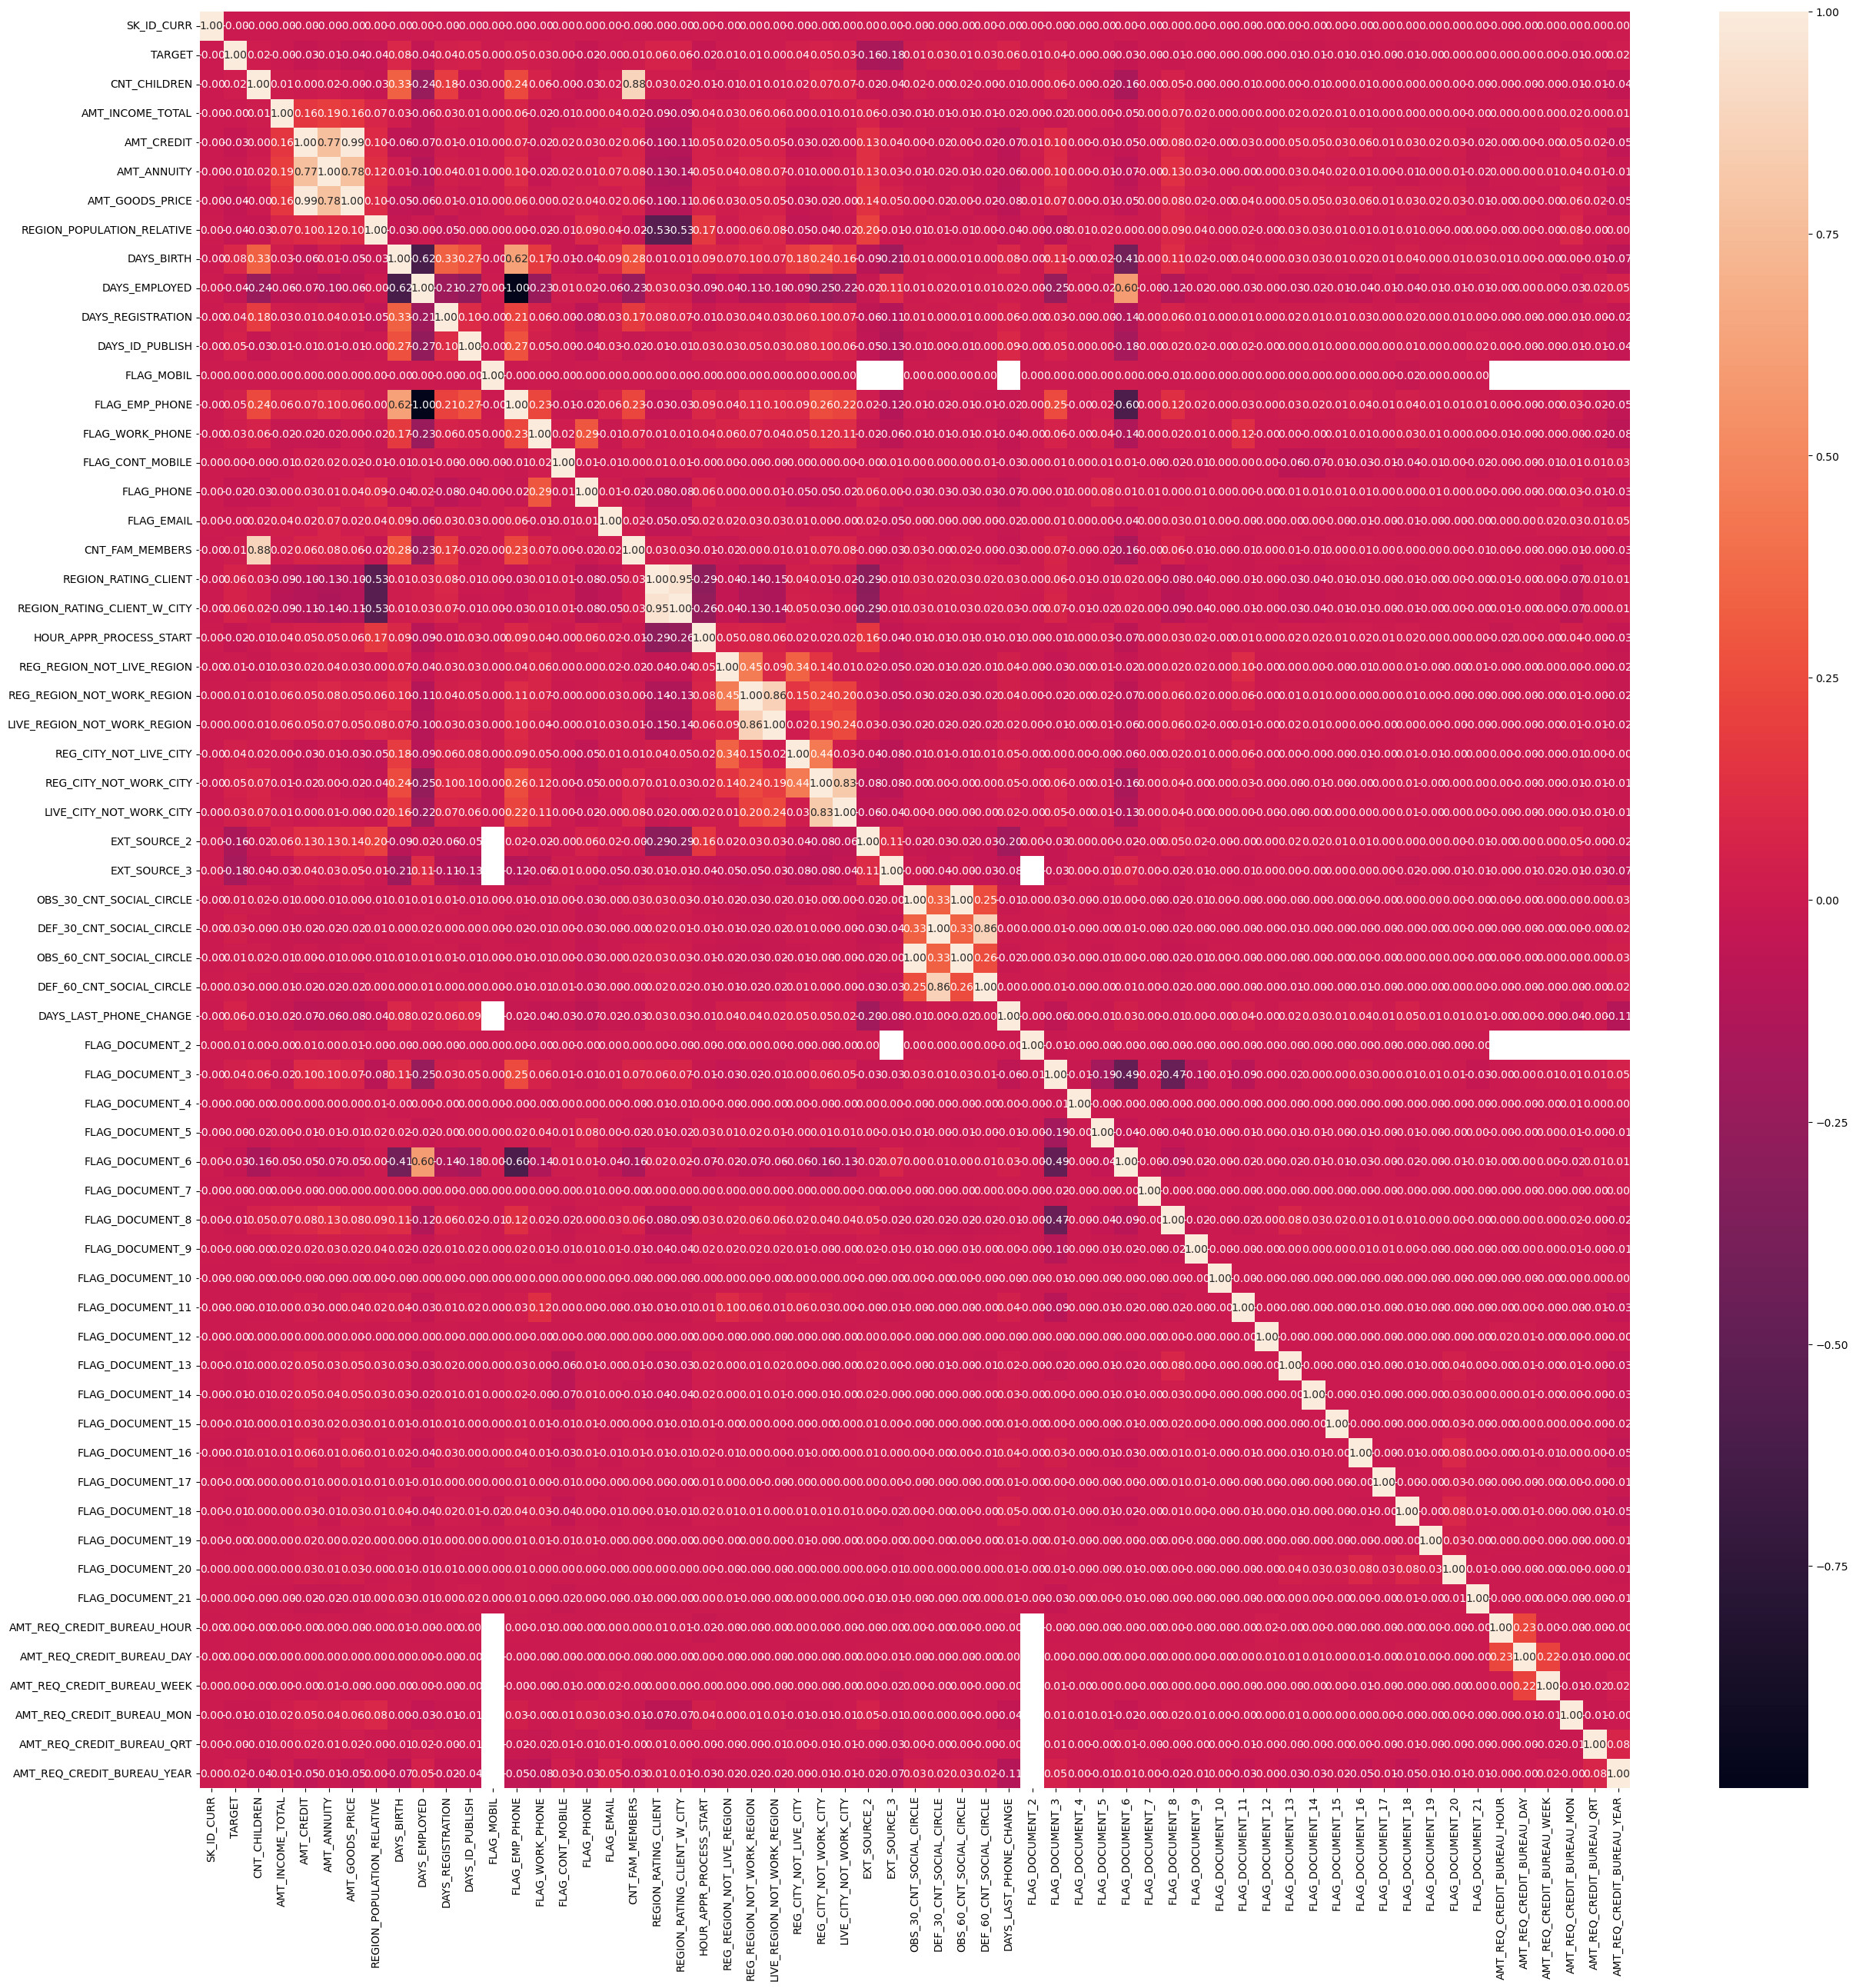

In [8]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

# Preprocessing

In [9]:
def preprocessing(df):
    # List drop feature because have high cardinality,high correlation,unnecesarry for credit risk because majority on 0 value
    list_drop = ['ORGANIZATION_TYPE','FLAG_EMP_PHONE','FLAG_CONT_MOBILE','FLAG_MOBIL','REGION_RATING_CLIENT_W_CITY','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
                 'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON' ,'AMT_REQ_CREDIT_BUREAU_QRT',
                 'AMT_GOODS_PRICE','WEEKDAY_APPR_PROCESS_START','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
                 'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
                 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
                 'DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','LIVE_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION','REG_REGION_NOT_LIVE_REGION']
    df.drop(columns=list_drop, inplace = True)
    
    # Fill Numeric Null Value
    list_num = ['EXT_SOURCE_3','EXT_SOURCE_2','AMT_ANNUITY','DAYS_LAST_PHONE_CHANGE','CNT_FAM_MEMBERS','AMT_REQ_CREDIT_BUREAU_YEAR']
    for num in list_num:
        df[num] = df[num].fillna(df[num].median())
    
    #Fill Category Null Value
    list_cat = ['NAME_TYPE_SUITE']
    for cat in list_cat:
        df[cat] = df[cat].fillna(df[cat].mode()[0])
    df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('Other')
    
    # Create new feature
    df['AGE'] = round((df['DAYS_BIRTH'].abs()/365),0)
    df['EMP_LENGTH'] = round((df['DAYS_EMPLOYED'].abs()/365),0)
    df['REGIST_LENGTH'] = round((df['DAYS_REGISTRATION'].abs()/365),0)
    df['PUBLISH_LENGTH'] = round((df['DAYS_ID_PUBLISH'].abs()/365),0)
    df['PHONE_CHANGE_LENGTH'] = round((df['DAYS_LAST_PHONE_CHANGE'].abs()/365),0)
    list_new_feature = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']
    df.drop(columns= list_new_feature, inplace = True)
    
    # Replace other to non dominant values in categorical
    df['NAME_TYPE_SUITE'].replace(to_replace = ['Other_B','Other_A','Group of people'], value = 'Other', inplace = True)
    df['NAME_INCOME_TYPE'].replace(to_replace = ['Unemployed','Student','Businessman','Maternity leave'], value = 'Other', inplace = True)
    df['NAME_FAMILY_STATUS'].replace(to_replace = ['Civil marriage','Unknown'], value = 'Married', inplace = True)
    df['NAME_HOUSING_TYPE'].replace(to_replace = ['Municipal apartment','Rented apartment','Office apartment','Co-op apartment'], value = 'Other', inplace = True)
    
    # Occupation Type
    office = ['IT staff','HR staff','Secretaries','Accountants','High skill tech staff','Managers','Sales staff','Core staff','Realty agents']
    service = ['Waiters/barmen staff','Private service staff','Cleaning staff','Cooking staff','Security staff','Medicine staff','Drivers']
    labour = ['Low-skill Laborers','Laborers']
    df['OCCUPATION_TYPE'].replace(to_replace = office, value = 'Office Job', inplace = True)
    df['OCCUPATION_TYPE'].replace(to_replace = service, value = 'Service Job', inplace = True)
    df['OCCUPATION_TYPE'].replace(to_replace = labour, value = 'Labour Job', inplace = True)
    
    # Drop Row that contain XNA in code gender
    df = df.drop(df[df['CODE_GENDER'] == 'XNA'].index,inplace = True)

In [10]:
df_pre = df.copy()

In [11]:
preprocessing(df_pre)

In [12]:
num = df_pre.select_dtypes(include='number').columns

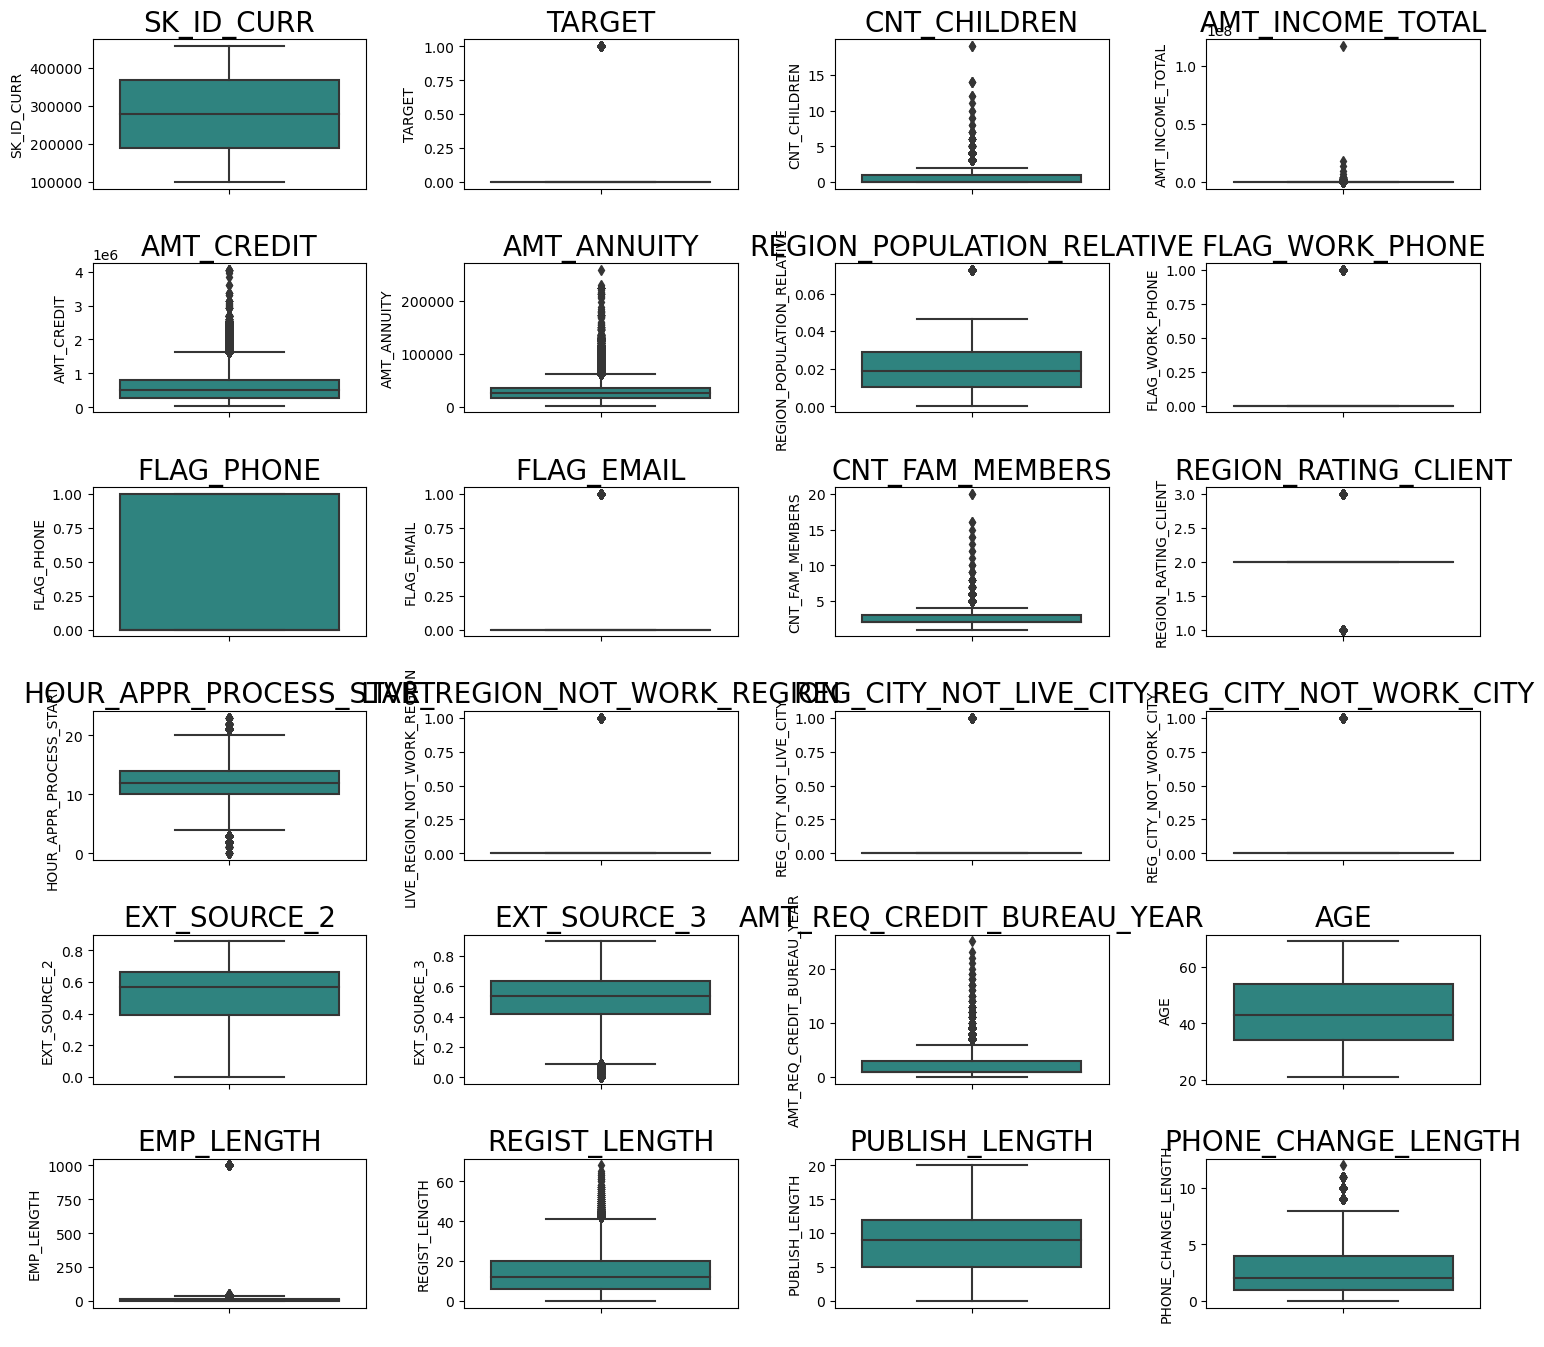

In [13]:
plt.figure(figsize=(15,20))
for i in range(0,len(num)):
    plt.subplot(9,4,i+1)
    sns.boxplot(y=df_pre[num[i]], palette='viridis')
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

Outlier
* AMT_INCOME_TOTAL > 4200000
* DEF_30_CNT_SOCIAL_CIRCLE >10
* DEF_60_CNT_SOCIAL_CIRCLE >10
* EMP_LENGTH > 100

In [14]:
list_outlier = df_pre.index[(df_pre['AMT_INCOME_TOTAL'] > 4200000) | (df_pre['EMP_LENGTH'] > 100)]
list_outlier = sorted(set(list_outlier))
df_pre_cleaned = df_pre.drop(list_outlier)

In [15]:
df_pre.shape

(307507, 34)

In [16]:
df_pre_cleaned.shape

(252124, 34)

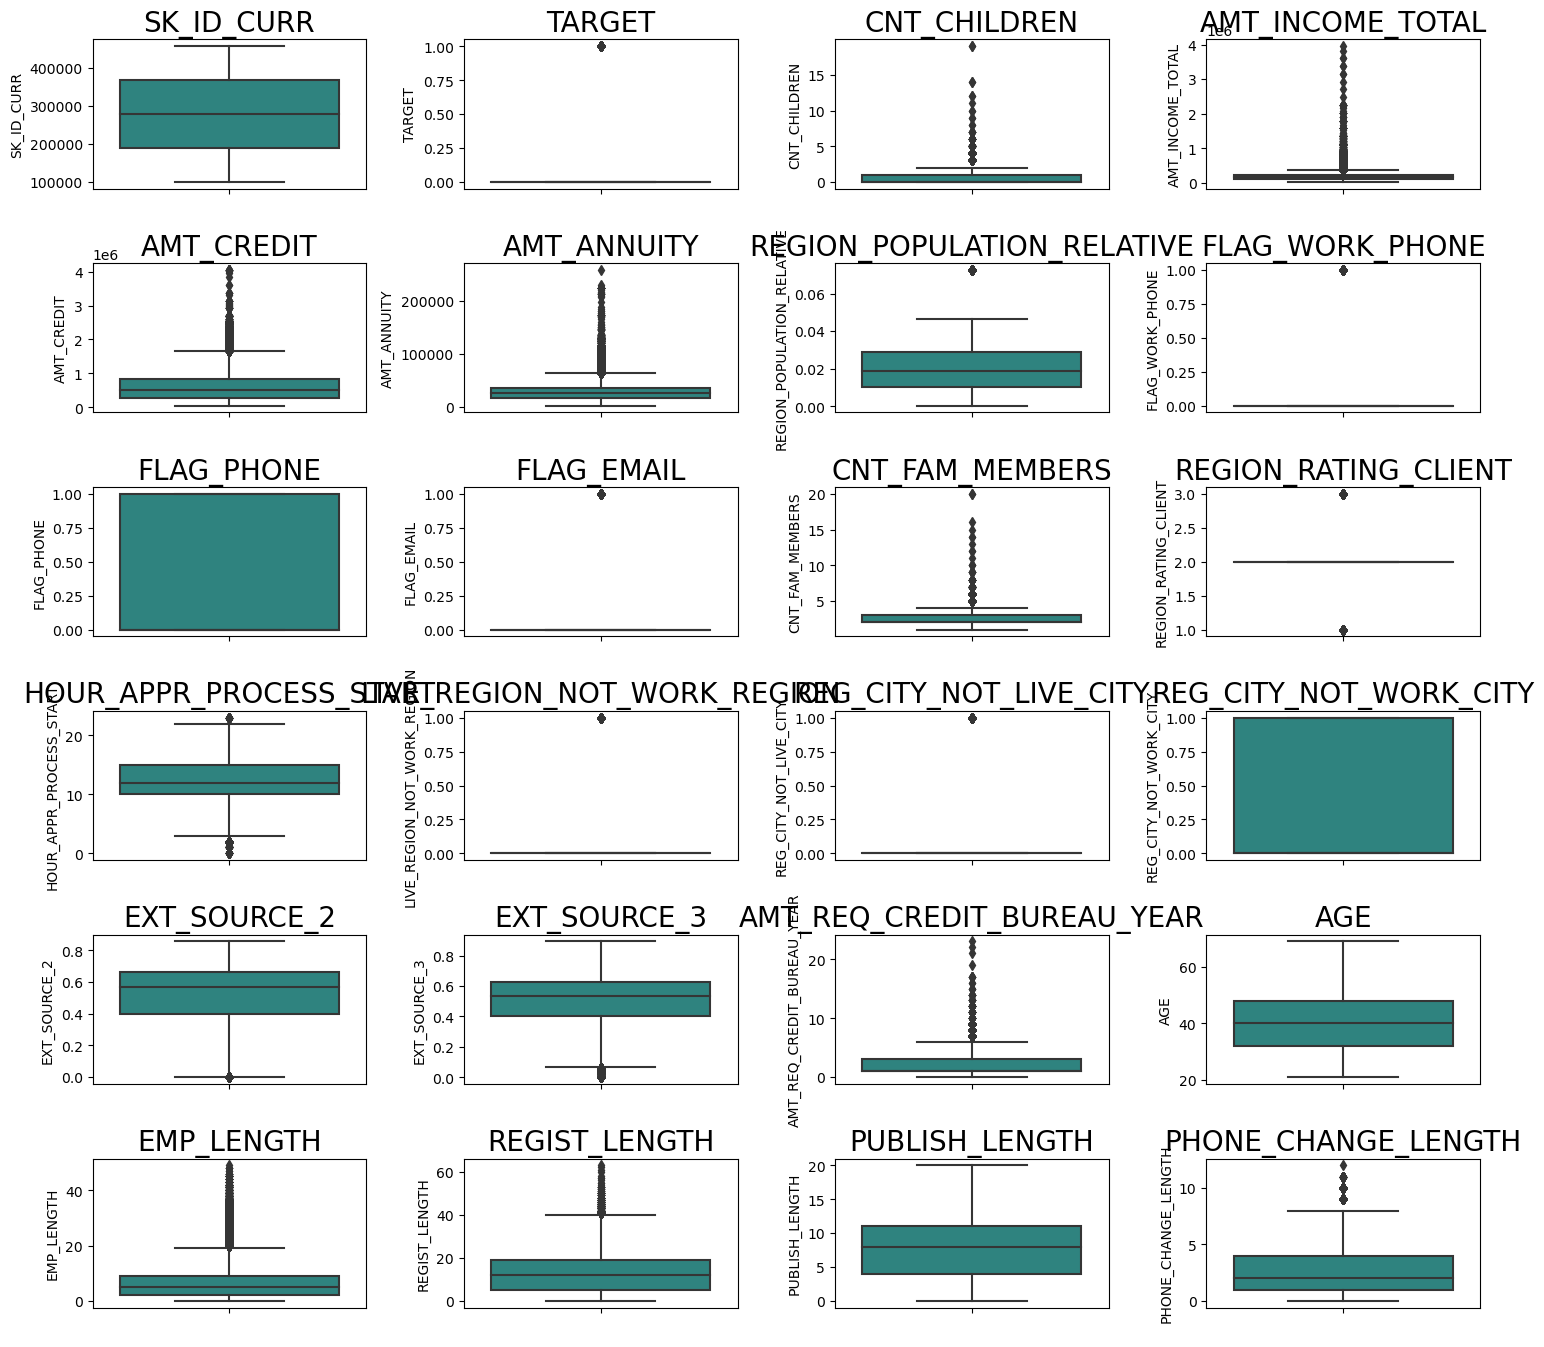

In [17]:
plt.figure(figsize=(15,20))
for i in range(0,len(num)):
    plt.subplot(9,4,i+1)
    sns.boxplot(y=df_pre_cleaned[num[i]], palette='viridis')
    plt.title(num[i], fontsize=20)
    plt.xlabel(' ')
    plt.tight_layout()

In [18]:
df_model = df_pre_cleaned.copy()

# Encoding

In [19]:
def label_encode(df):
    # NAME_CONTRACT_TYPE (1 = Cash loans, 0 = Revolving loans)
    df['NAME_CONTRACT_TYPE'] = np.where(df['NAME_CONTRACT_TYPE']=='Cash loans',1,0)
    # CODE GENDER (1 = M, 0 = F)
    df['CODE_GENDER'] = np.where(df['CODE_GENDER']=='M',1,0)
    # FLAG_OWN_CAR (Y = 1, N = 0)
    df['FLAG_OWN_CAR'] = np.where(df['FLAG_OWN_CAR']=='Y',1,0)
    # FLAG_OWN_REALTY (Y = 1, N = 0)
    df['FLAG_OWN_REALTY'] = np.where(df['FLAG_OWN_REALTY']=='Y',1,0)

In [20]:
label_encode(df_model)

# Modelling

In [21]:
from pycaret.classification import *

In [22]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252124 entries, 0 to 307510
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   252124 non-null  int64  
 1   TARGET                       252124 non-null  int64  
 2   NAME_CONTRACT_TYPE           252124 non-null  int32  
 3   CODE_GENDER                  252124 non-null  int32  
 4   FLAG_OWN_CAR                 252124 non-null  int32  
 5   FLAG_OWN_REALTY              252124 non-null  int32  
 6   CNT_CHILDREN                 252124 non-null  int64  
 7   AMT_INCOME_TOTAL             252124 non-null  float64
 8   AMT_CREDIT                   252124 non-null  float64
 9   AMT_ANNUITY                  252124 non-null  float64
 10  NAME_TYPE_SUITE              252124 non-null  object 
 11  NAME_INCOME_TYPE             252124 non-null  object 
 12  NAME_EDUCATION_TYPE          252124 non-null  object 
 13 

In [23]:
num = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE','CNT_FAM_MEMBERS',
       'HOUR_APPR_PROCESS_START','EXT_SOURCE_2','EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE', 'EMP_LENGTH',
       'REGIST_LENGTH', 'PUBLISH_LENGTH', 'PHONE_CHANGE_LENGTH']

cat = ['NAME_CONTRACT_TYPE','CODE_GENDER', 'FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_WORK_PHONE','REGION_RATING_CLIENT','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',
      'REG_CITY_NOT_WORK_CITY','FLAG_PHONE', 'FLAG_EMAIL']

ordinal = {'NAME_EDUCATION_TYPE' : ['Lower secondary','Secondary / secondary special','Higher education','Incomplete higher','Academic degree']}

In [24]:
experiment = setup(data = df_model, # data to train
                   target = 'TARGET', # target variable
                   train_size = 0.7, # split size related to train set (default)
                   ignore_features= ['SK_ID_CURR'],
                   numeric_features = num, #list of numerical
                   categorical_features = cat,
                   imputation_type = 'simple', # pycaret style on imputing null values (default)
                   ordinal_features = ordinal, # specifically for categorical features with ordinal number
                   normalize = True, # wether the scalling of numerical features will be performed or not
                   normalize_method = 'robust', # how pycaret will be re-scalling the data
                   remove_multicollinearity = True,  # wether the multicolinearity will be dropped or not 
                   multicollinearity_threshold= 0.8, # pycaret will drop features that match the given threshold (default)
                   feature_selection = True, # This will selectively choose feature using permutaion of feature importance (default: 'classic', threshold 0.8)
                   fix_imbalance = True, # fixing target imbalance, (default will automatically use SMOTE)
                   fold = 5, # cross validation strategy (default will automatically choose StratifiedKFold)
                   session_id = 24) # same as seed / random_state

,Description,Value
0,session_id,24
1,Target,TARGET
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(252124, 34)"
5,Missing Values,False
6,Numeric Features,15
7,Categorical Features,17
8,Ordinal Features,True
9,High Cardinality Features,False


# Test ML

In [25]:
# Listing models that will be compared
model = ['lr','gbc','rf'] 

# Comparing models
best_model = compare_models(include = model,sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6826,0.7277,0.6513,0.1636,0.2615,0.1434,0.1992,21.8160
rf,Random Forest Classifier,0.9111,0.7118,0.0238,0.3061,0.0442,0.0322,0.0644,96.5480
gbc,Gradient Boosting Classifier,0.9041,0.7082,0.0772,0.2898,0.1218,0.0888,0.1111,203.1200


In [26]:
# Creating model
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6798,0.7286,0.6619,0.1641,0.2630,0.1447,0.2024
1,0.6787,0.7258,0.6509,0.1617,0.2590,0.1402,0.1959
2,0.6829,0.7326,0.6594,0.1651,0.2641,0.1463,0.2036
3,0.6835,0.7201,0.6394,0.1620,0.2584,0.1401,0.1937
4,0.6882,0.7313,0.6447,0.1652,0.2629,0.1456,0.2002
Mean,0.6826,0.7277,0.6513,0.1636,0.2615,0.1434,0.1992
SD,0.0033,0.0045,0.0085,0.0015,0.0023,0.0027,0.0038


In [27]:
tuned_lr = tune_model(lr,n_iter = 50,optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6798,0.7286,0.6619,0.1641,0.2629,0.1446,0.2024
1,0.6788,0.7258,0.6509,0.1617,0.2590,0.1402,0.1959
2,0.6830,0.7327,0.6594,0.1651,0.2641,0.1464,0.2037
3,0.6834,0.7201,0.6397,0.1620,0.2585,0.1401,0.1939
4,0.6883,0.7313,0.6450,0.1653,0.2631,0.1458,0.2004
Mean,0.6827,0.7277,0.6514,0.1636,0.2615,0.1434,0.1993
SD,0.0033,0.0045,0.0084,0.0015,0.0023,0.0027,0.0038


In [28]:
testpred = predict_model(tuned_lr) 

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6805,0.7256,0.6435,0.1632,0.2603,0.1405,0.1946


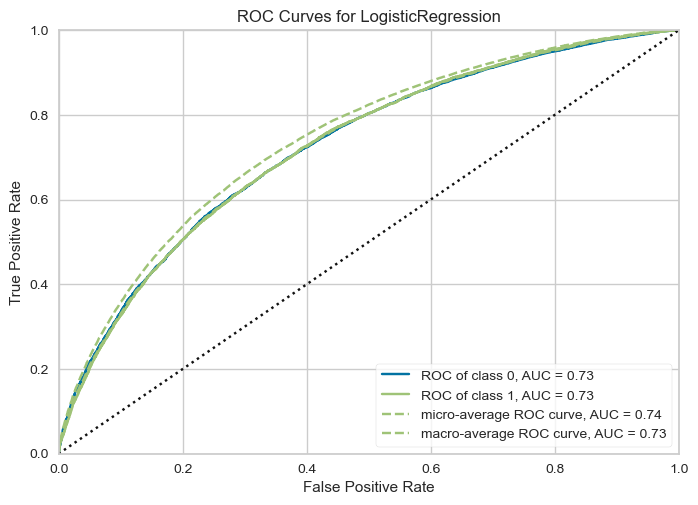

In [29]:
plot_model(tuned_lr, plot = 'auc')

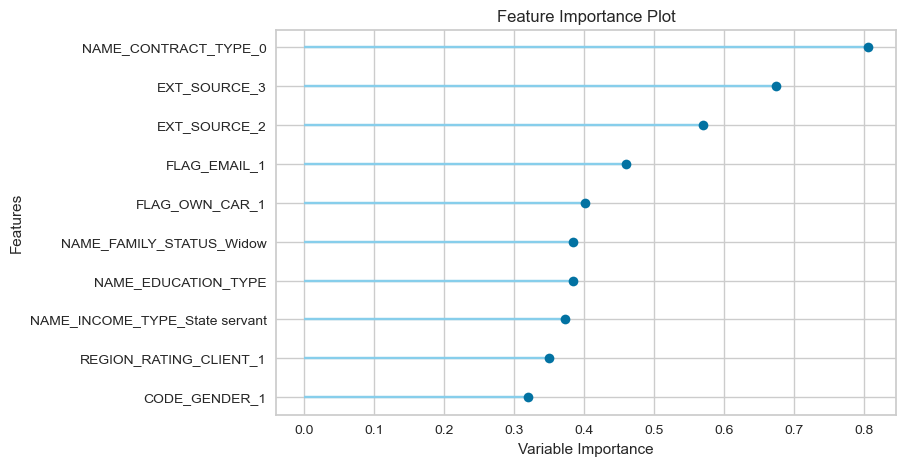

In [30]:
plot_model(tuned_lr, 'feature')

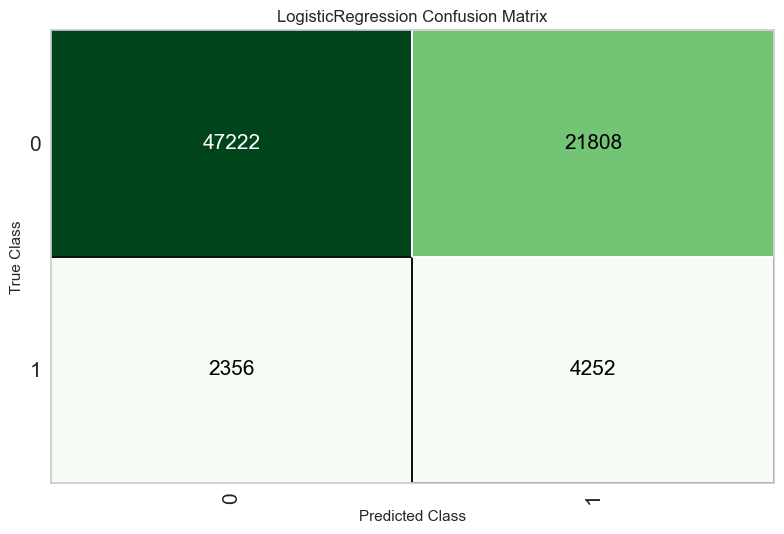

In [31]:
plot_model(tuned_lr, 'confusion_matrix')

In [32]:
final_lr = finalize_model(tuned_lr)

In [33]:
print(final_lr)

LogisticRegression(C=0.113, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=24, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


# Test new dataset

In [34]:
test = pd.read_csv('application_test.csv')

In [35]:
preprocessing(test)

In [36]:
label_encode(test)

In [37]:
test_predict = test.copy()

## Threshold 0.5

In [38]:
result = predict_model(final_lr,test_predict)

In [39]:
result['Label'].value_counts()

0    34364
1    14380
Name: Label, dtype: int64

In [40]:
result.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,...,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,EMP_LENGTH,REGIST_LENGTH,PUBLISH_LENGTH,PHONE_CHANGE_LENGTH,Label,Score
0,100001,1,0,0,1,0,135000.0,568800.0,20560.5,Unaccompanied,...,"Stone, brick",No,0.0,53.0,6.0,14.0,2.0,5.0,0,0.6000
1,100005,1,1,0,1,0,99000.0,222768.0,17370.0,Unaccompanied,...,NaN,NaN,3.0,49.0,12.0,25.0,4.0,0.0,1,0.7864
2,100013,1,1,1,1,0,202500.0,663264.0,69777.0,Unaccompanied,...,NaN,NaN,4.0,55.0,12.0,6.0,10.0,2.0,0,0.7117
3,100028,1,0,0,1,2,315000.0,1575000.0,49018.5,Unaccompanied,...,Panel,No,3.0,38.0,5.0,5.0,12.0,5.0,0,0.6581
4,100038,1,1,1,0,1,180000.0,625500.0,32067.0,Unaccompanied,...,NaN,NaN,2.0,36.0,6.0,11.0,12.0,2.0,1,0.5071


In [41]:
result.groupby(['Label']).agg(mean_credit = ('AMT_CREDIT','mean')).reset_index()

,Label,mean_credit
0,0,544050.440126
1,1,451477.501147


In [42]:
result.groupby(['Label']).agg(total_customer = ('SK_ID_CURR','count')).reset_index()

,Label,total_customer
0,0,34364
1,1,14380


In [43]:
sample_result = result[['SK_ID_CURR','Label','Score']]

In [44]:
sample_result.sample(5)

,SK_ID_CURR,Label,Score
25317,284272,0,0.8018
34543,352304,1,0.6931
2234,115759,0,0.6074
1386,109798,0,1.0000
46109,437130,0,1.0000


## Threshold 0.7

In [45]:
result_2 = predict_model(final_lr,test_predict,probability_threshold = 0.7)

In [46]:
result_2['Label'].value_counts()

0    44000
1     4744
Name: Label, dtype: int64

In [47]:
result_2.groupby(['Label']).agg(mean_credit = ('AMT_CREDIT','mean')).reset_index()

,Label,mean_credit
0,0,527613.928977
1,1,415890.159359


In [48]:
result_2.groupby(['Label']).agg(total_customer = ('SK_ID_CURR','count')).reset_index()

,Label,total_customer
0,0,44000
1,1,4744


## Insight

In [84]:
result_groupby = result.groupby(['NAME_INCOME_TYPE','Label']).agg(num_customer = ('SK_ID_CURR','count')).reset_index()
total_cust = result_groupby.groupby('NAME_INCOME_TYPE').agg(total_customer = ('num_customer','sum')).reset_index()
result_groupby_merge = result_groupby.merge(total_cust,on = ['NAME_INCOME_TYPE'])
result_groupby_merge['percentage'] = round(result_groupby_merge['num_customer']/result_groupby_merge['total_customer']*100, 2)
result_groupby_merge = result_groupby_merge.sort_values('percentage',ascending = False)
result_groupby_merge

,NAME_INCOME_TYPE,Label,num_customer,total_customer,percentage
2,Other,0,4,4,100.00
3,Pensioner,0,9273,9273,100.00
4,State servant,0,3011,3532,85.25
0,Commercial associate,0,8170,11402,71.65
6,Working,0,13906,24533,56.68
7,Working,1,10627,24533,43.32
1,Commercial associate,1,3232,11402,28.35
5,State servant,1,521,3532,14.75


In [87]:
result_groupby_acc = result_groupby_merge[(result_groupby_merge['Label'] == 0) & (result_groupby_merge['NAME_INCOME_TYPE'] != 'Other')]
result_groupby_acc

,NAME_INCOME_TYPE,Label,num_customer,total_customer,percentage
3,Pensioner,0,9273,9273,100.00
4,State servant,0,3011,3532,85.25
0,Commercial associate,0,8170,11402,71.65
6,Working,0,13906,24533,56.68


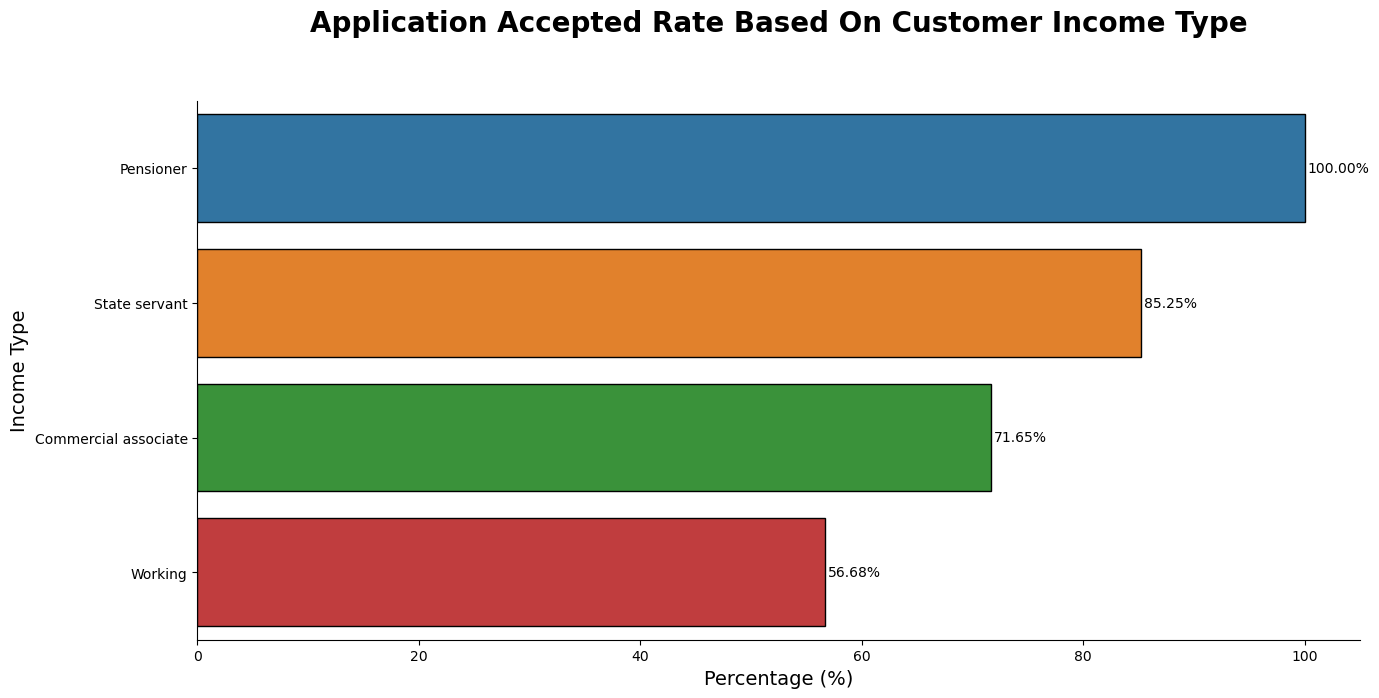

In [114]:
plt.style.use('default')
fig, ax = plt.subplots(figsize=(15, 7))
plt.title("Application Accepted Rate Based On Customer Income Type", fontsize=20, color='black', weight='bold',pad = 50)
#plt.text(x=0, y=-2, s="Persentase tertinggi karyawan resign Data Analyst 50%  ,disusul Sofware Engineer (Front End) 61% dan Product Design (UI & UX) 62%\nSoftware Engineer Front End maupun Back End memiliki jumlah karywan resign tertinggi ",
         #fontsize=15, fontstyle='italic')
sns.barplot(y='NAME_INCOME_TYPE', x='percentage', data=result_groupby_acc, edgecolor='black')
plt.bar_label(ax.containers[0], padding=2,fmt='%.2f%%')
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('Income Type', fontsize=14)
sns.despine()

In [101]:
pie_chart = result.groupby('NAME_INCOME_TYPE').agg(num_customer = ('SK_ID_CURR','count')).reset_index().sort_values('num_customer',ascending = False)
pie_chart['total_customer'] = pie_chart['num_customer'].sum()
pie_chart['percentage'] = round(pie_chart['num_customer']/pie_chart['total_customer']*100, 2)
pie_chart= pie_chart.sort_values('percentage',ascending = False)
pie_chart = pie_chart[pie_chart['NAME_INCOME_TYPE'] != 'Other']
pie_chart

,NAME_INCOME_TYPE,num_customer,total_customer,percentage
4,Working,24533,48744,50.33
0,Commercial associate,11402,48744,23.39
2,Pensioner,9273,48744,19.02
3,State servant,3532,48744,7.25


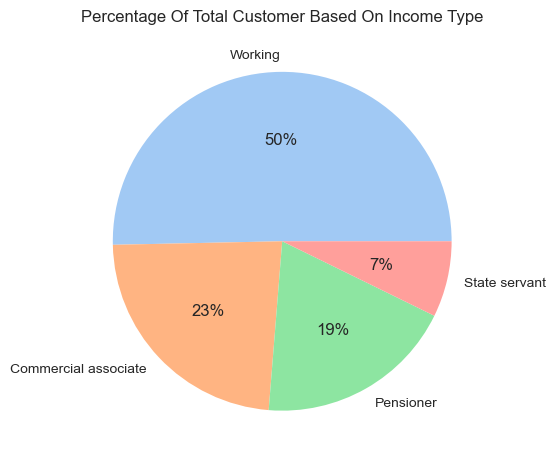

In [105]:
# declaring data
data = pie_chart['percentage']
keys = ['Working', 'Commercial associate', 'Pensioner', 'State servant']
  
# define Seaborn color palette to use
palette_color = sns.color_palette('pastel')
  
# plotting data on chart
plt.title('Percentage Of Total Customer Based On Income Type')
plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
  
# displaying chart
plt.show()